In [22]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pymssql
import sklearn

from joblib import dump, load
from config import server, k_username, k_password, database, table, table2
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, LinearRegression, Ridge, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef
from sklearn.model_selection import train_test_split

sns.set_theme(style = 'darkgrid')

In [2]:
# Version for libraries and python, making sure to copy down for the README
from platform import python_version


print('Pandas version: ' + str(pd.__version__))
print('Matplotlib version:' + str(matplotlib.__version__))
print('Numpy version: ' + str(np.__version__))
print('Seaborn version: ' + str(sns.__version__))
print('Pymssql version: ' + str(pymssql.__version__))
print('Python version: ' + str(python_version()))
print('Sklearn version: ' + str(sklearn.__version__))

Pandas version: 1.5.0
Matplotlib version:3.6.0
Numpy version: 1.23.3
Seaborn version: 0.12.0
Pymssql version: 2.2.5
Python version: 3.10.6
Sklearn version: 1.1.2


In [4]:
# Connection strings for SQL tables
conn = pymssql.connect(server, k_username, k_password, database)
query = f'SELECT * FROM {table}'

health_model = pd.read_sql(query, conn)

query2 = f'SELECT * FROM {table2}'

Xdemo = pd.read_sql(query2, conn)

C:\Users\kylee\AppData\Local\Temp\ipykernel_9284\739456482.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  health_model = pd.read_sql(query, conn)
C:\Users\kylee\AppData\Local\Temp\ipykernel_9284\739456482.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Xdemo = pd.read_sql(query2, conn)


In [105]:
# Getting dummy variables

#all 0s = insured
icD = pd.get_dummies(health_model['Insurance_Category'], drop_first = True)

icD = icD.rename(columns={'Total': 'InsuredAndUninsured'})

h_m = health_model.drop(columns = ['State', 'County', 'Insurance_Category', 'Total_Population', 'HealthModelID', 'Year']).copy()

h_m = h_m.join(icD)


#all 0s = insured
icD = pd.get_dummies(Xdemo['Insurance_Category'], drop_first = True)

icD = icD.rename(columns={'Total': 'InsuredAndUninsured'})

x_m = Xdemo.drop(columns = ['State', 'County', 'Insurance_Category', 'Total_Population', 'TestDemoID']).copy()

x_m = x_m.join(icD)

C:\Users\kylee\AppData\Local\Temp\ipykernel_16860\562054583.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heatmapDF.corr(), cmap = 'magma', annot = True, mask = np.triu(np.ones_like(heatmapDF.corr())))


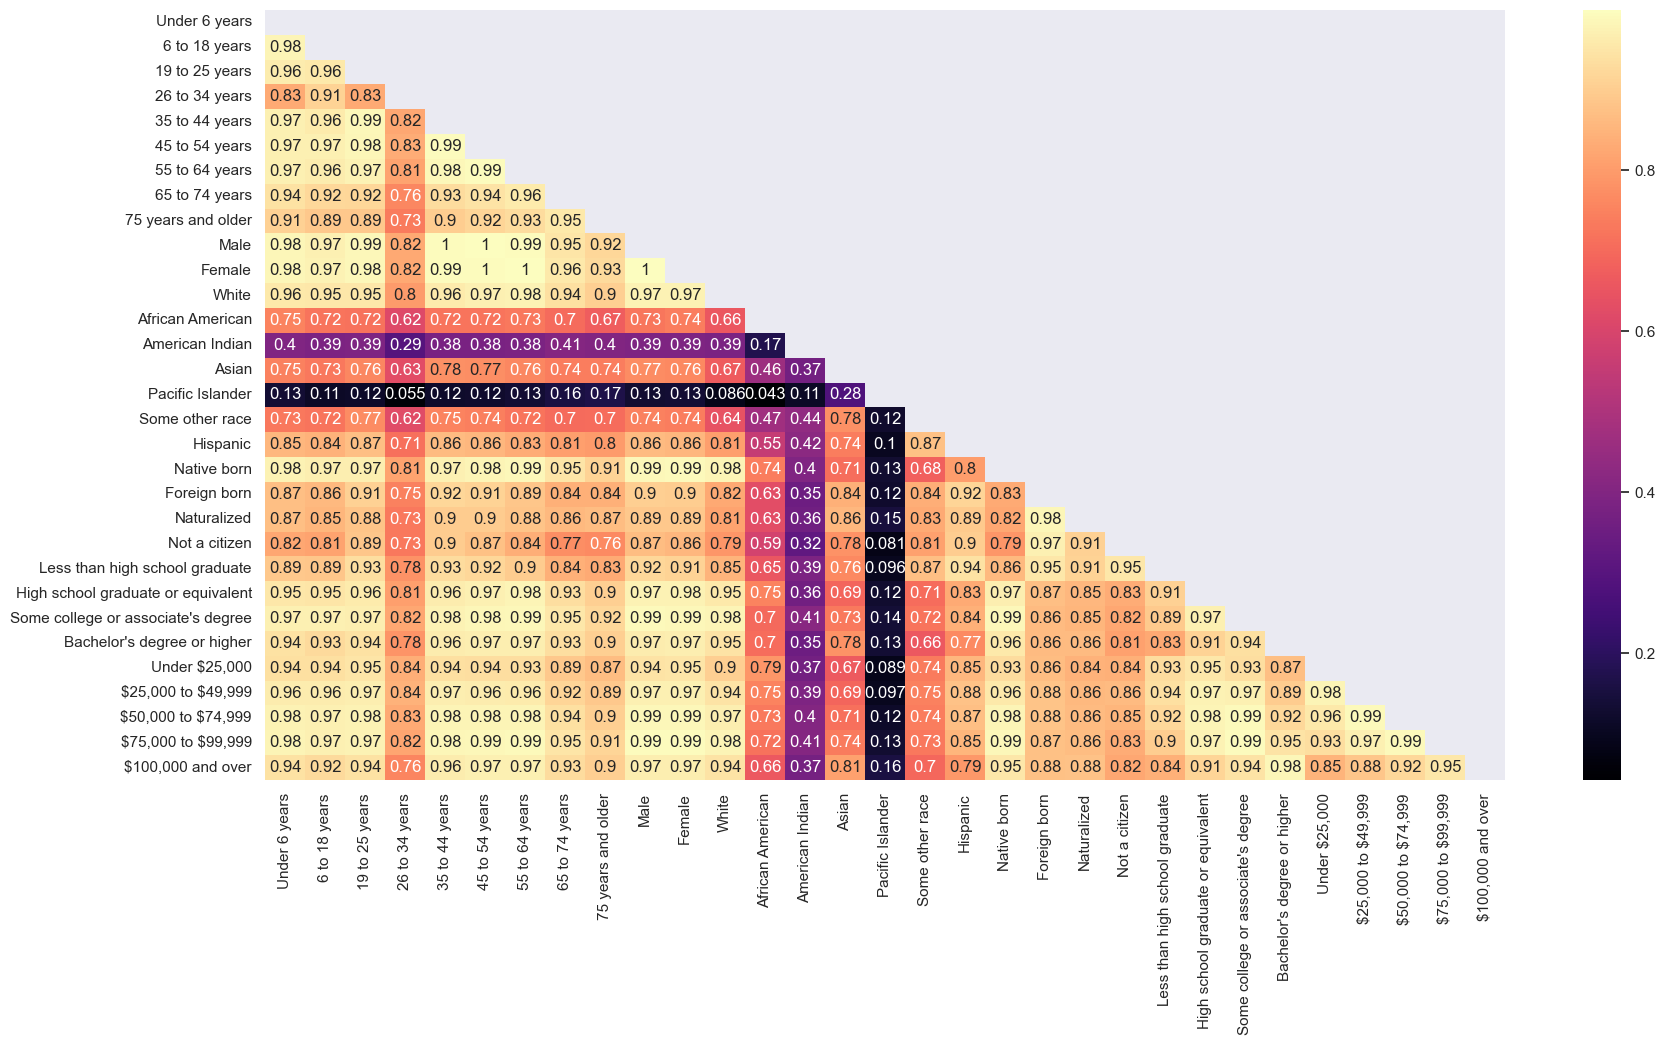

In [5]:
# Heatmap colors: 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
plt.figure(figsize = (20, 10))
heatmapDF = health_model.drop(columns = ['HealthModelID', 'Year', 'Total_Population'], axis = 1).copy()
sns.heatmap(heatmapDF.corr(), cmap = 'magma', annot = True, mask = np.triu(np.ones_like(heatmapDF.corr())))
labels = ['Under 6 years', '6 to 18 years', '19 to 25 years', '26 to 34 years', '35 to 44 years', \
    '45 to 54 years', '55 to 64 years', '65 to 74 years', '75 years and older', 'Male', \
    'Female', 'White', 'African American', 'American Indian', 'Asian', 'Pacific Islander', \
    'Some other race', 'Hispanic', \
    'Native born', 'Foreign born', 'Naturalized', 'Not a citizen', \
    'Less than high school graduate', 'High school graduate or equivalent', \
    "Some college or associate's degree", "Bachelor's degree or higher", 'Under $25,000', '\$25,000 to \$49,999', \
    '\$50,000 to \$74,999', '\$75,000 to \$99,999', '$100,000 and over']
plt.yticks(np.arange(31) + .5, labels = labels)
plt.xticks(np.arange(31) + .5, labels = labels)
plt.savefig('Correlation-Matrix.png', bbox_inches = 'tight')
plt.show()

In [111]:
# Creating training and testing datasets
y_test = x_m['Uninsured']
x_test = x_m.drop(columns = 'Uninsured', axis = 1).copy()

Y_train = h_m['Uninsured']
X_train = h_m.drop(columns = 'Uninsured', axis = 1).copy()

In [112]:
reg_log1 = LogisticRegression(C = 1.201, penalty = 'l1', solver = 'liblinear', max_iter = 10_000)
reg_log1.fit(X_train, Y_train)
y_pred = reg_log1.predict(x_test)
print('Default solver and penalty')
print(f"Number of Iterations: {reg_log1.n_iter_}")
print(f"In-sample accuracy: {reg_log1.score(x_test, y_test):.3f}\n")

cm = confusion_matrix(y_test, y_pred)
print('\nLiblinear Solver with C = 1.201')
print(cm)

Default solver and penalty
Number of Iterations: [16]
In-sample accuracy: 0.831


Liblinear Solver with C = 1.201
[[1089  548]
 [   6 1631]]


county and state by population demographics and the model is determining whether the 

In [7]:
# # TUNING MODEL FOR HIGHER ACCURACY

# # testing all hyperparameters
# from sklearn.model_selection import GridSearchCV
# algorithm = LogisticRegression(max_iter = 1_000)

# p_range = ['l1', 'l2', 'elasticnet', 'none']
# s_range = ['liblinear', 'lbgfs', 'sag', 'saga', 'newton-cg']
# c_range = list(np.arange(0.0001, 2, 0.0001))
# param_grid = dict(solver = s_range, penalty = p_range, C = c_range)

# grid = GridSearchCV(algorithm,param_grid,scoring='accuracy')
# grid_search = grid.fit(X_train, Y_train)
# print(grid_search.best_params_)

Default solver and penalty
Number of Iterations: [306]
In-sample accuracy: 0.806

Solver: liblinear
Penalty: l1
Number of Iterations: [17]
In-sample accuracy: 0.840

Solver: liblinear
Penalty: l1
Number of Iterations: [21]
In-sample accuracy: 0.952

No tuning
[[1637    0]
 [ 634 1003]]

Liblinear Solver with C = 1.201
[[1120  517]
 [   6 1631]]


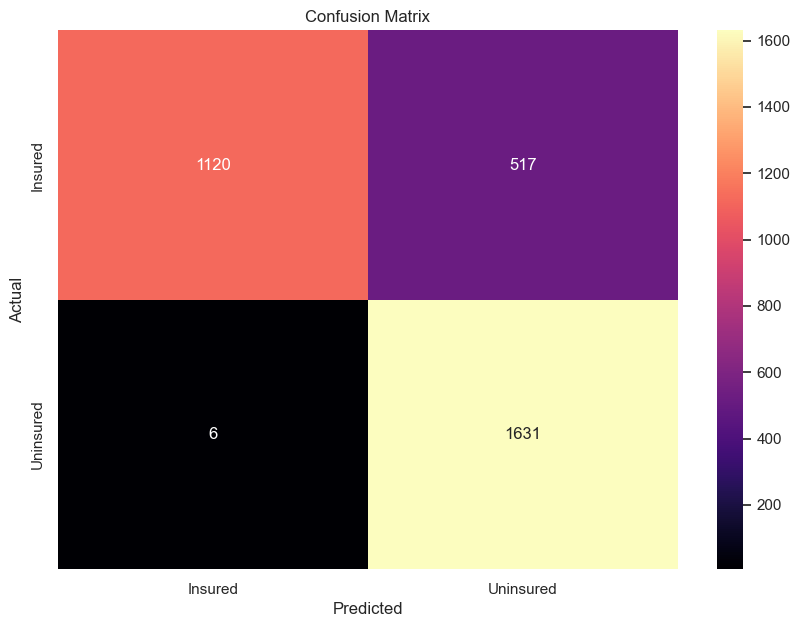


Liblinear Solver with C = 0.38
[[1581   56]
 [ 100 1537]]


In [8]:
# LOGISTIC REGRESSION MODEL AND TUNING PARAMETERS
# Evaluating with testing data

# Logistic Regression Model, no hyperparameters besides max iterations
reg_log1 = LogisticRegression(max_iter = 10_000)
reg_log1.fit(X_train, Y_train)
y_pred = reg_log1.predict(x_test)
print('Default solver and penalty')
print(f"Number of Iterations: {reg_log1.n_iter_}")
print(f"In-sample accuracy: {reg_log1.score(x_test, y_test):.3f}\n")


# Logistic Regression Model, using l1 penalty and solver liblinear
reg_log_final = LogisticRegression(C = 1.201, penalty = 'l1', solver = 'liblinear', max_iter = 10_000)
reg_log_final.fit(X_train, Y_train)
y_pred_final = reg_log_final.predict(x_test)
print('Solver: liblinear\nPenalty: l1')
print(f"Number of Iterations: {reg_log_final.n_iter_}")
print(f"In-sample accuracy: {reg_log_final.score(x_test, y_test):.3f}\n")


# Logistic Regression Model, using l1 penalty and solver liblinear
reg_log2 = LogisticRegression(C = 0.38, penalty = 'l1', solver = 'liblinear', max_iter = 10_000).fit(X_train, Y_train)
y_pred_log = reg_log2.predict(x_test)
print('Solver: liblinear\nPenalty: l1')
print(f"Number of Iterations: {reg_log2.n_iter_}")
print(f"In-sample accuracy: {reg_log2.score(x_test, y_test):.3f}\n")

# Comparing two different C-values with the original, untuned logistic regression as there were two values that were 
# outputed when rerunning the GridSearch code

cm = confusion_matrix(y_test, y_pred)
print('No tuning')
print(cm)

cm = confusion_matrix(y_test, y_pred_final)
print('\nLiblinear Solver with C = 1.201')
print(cm)
plt.figure(figsize=(10,7))
sns.heatmap(cm, cmap = 'magma', annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.yticks(np.arange(2) + .5, labels = ['Insured', 'Uninsured'])
plt.xticks(np.arange(2) + .5, labels = ['Insured', 'Uninsured'])
plt.savefig('Confusion-Matrix.png', bbox_inches = 'tight')
plt.show()

cm = confusion_matrix(y_test, y_pred_log)
print('\nLiblinear Solver with C = 0.38')
print(cm)

The best hyperparameters for Logistic Regression we found was using liblinear as a solver with penalty as l1 and a C value of 1.201
    We did try the other penalties and solvers within LogisticRegression with the GridSearch function as well as different C values for a liblinear solver and a l1 penalty but none performed as well as a liblinear solver with penalty as l1 and a C value of 1.201 with mislabelling uninsured people in the correlation matrix. 

This decreased the number of people that were uninsured who were mislabeled as having insurance and increased the number of 
    people who have insurance but were mislabeled as being uninsured.

We would rather have more people be mislabeled as uninsured when having insurance so we don't miss giving someone resources to help them get insurance compared to someone who doesn't have it and misses out on those resources for their state or county that they live in. 

**Exporting to PowerBI**

In [12]:
scalar = StandardScaler().fit(X_train)

X_train_std = pd.DataFrame(scalar.transform(X_train), columns = h_m.columns[:-1])

X_test_std = pd.DataFrame(scalar.transform(x_test), columns = x_m.columns[:-1])

In [10]:
reg_log_final.fit(X_train_std, Y_train)
y_pred_final = reg_log_final.predict(X_test_std)

print('Classification Report:')
print(classification_report(y_test, y_pred_final))

print("Matthews correlation coefficient:", matthews_corrcoef(y_test, y_pred_final))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.49      0.66      1637
           1       0.66      1.00      0.80      1637

    accuracy                           0.75      3274
   macro avg       0.83      0.75      0.73      3274
weighted avg       0.83      0.75      0.73      3274

Matthews correlation coefficient: 0.5705217170815642


In [ ]:
# dump(reg_log_final, 'LogisticRegression-joblib.model')

**Second Model**

In [ ]:
train = health_model[(health_model['Insurance_Category'] == 'Uninsured')].copy()
train2 = train.drop(columns = ['HealthModelID', 'State', 'County', 'Insurance_Category', 'Year']).copy()

demo = Xdemo.drop(columns = ['TestDemoID', 'State', 'County']).copy()
demo = demo[demo['Insurance_Category'] == 'Uninsured']
demo.drop(columns = 'Insurance_Category', inplace = True)

In [ ]:
scalar = StandardScaler().fit(demo)

demo_scaled = pd.DataFrame(scalar.transform(demo), columns = demo.columns)

scalar = StandardScaler().fit(train2)

train2_scaled = pd.DataFrame(scalar.transform(train2), columns = train2.columns)

In [ ]:
Y_train = train2_scaled['Under_25000S'].copy()
X_train = train2_scaled.drop(columns = ['Under_25000S', 'Total_Population']).copy()

Y_test = demo_scaled['Under_25000S'].copy()
X_test = demo_scaled.drop(columns = ['Under_25000S', 'Total_Population']).copy()

In [ ]:
reg_lin = ElasticNetCV()
reg_lin.fit(X_train, Y_train)
y_pred = reg_lin.predict(X_test)

In [ ]:
print(reg_lin.score(X_test, Y_test))

sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (15, 8))
plt.scatter(x = y_pred, y = Y_test, alpha = 0.25)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color = 'tab:red')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
# plt.xlim(-0.5, 5)
# plt.ylim(-0.5, 5)
plt.savefig("ElasticNet.png", bbox_inches = 'tight')
plt.show()

In [30]:
# dump(reg_lin, 'LinearRegression-joblib.model')

['LinearRegression-joblib.model']